# Module 1.0: Brief Review - Linear Algebra and Calculus for Neural Networks
 
## Objectives
- Understand the essential concepts of linear algebra and calculus required for building neural networks.
- Prepare the mathematical foundation for the following modules.
- Learn how to set up your Python environment for this course.
 
## How to Use This Notebook
This notebook is designed to be run in a Python virtual environment (venv). If you haven't already created one, you can do so with:
 
```bash
python -m venv venv
source venv/bin/activate  # On Windows use: venv\Scripts\activate
```
 
All required libraries will be installed using `pip`. As you progress through the notebooks, add any new libraries to a `requirements.txt` file. At the end of the setup, you can install all dependencies with:
 
```bash
pip install -r requirements.txt
```
 
## Libraries Used in This Module
- numpy
- matplotlib
 
Install them with:
 
```bash
pip install numpy matplotlib
```
 
## Datasets Needed
No external datasets are required for this module. All examples will use synthetic or small in-notebook data.
 
## What You Will Learn
- Vectors, matrices, and basic operations (addition, multiplication, dot product)
- Derivatives and gradients
- How these concepts apply to neural networks
 
## Results and Takeaways
By the end of this notebook, you will have a solid understanding of the mathematical tools needed to implement and train neural networks from scratch. This foundation will make the next modules much easier to follow.

## 1. Vectors and Matrices: The Building Blocks of Neural Networks

Vector: [2 4 6]
Matrix:
 [[1 2 3]
 [4 5 6]]


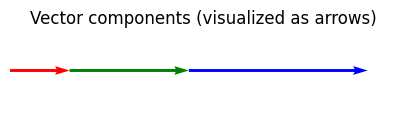

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a vector and a matrix
vector = np.array([2, 4, 6])
matrix = np.array([[1, 2, 3], [4, 5, 6]])

print('Vector:', vector)
print('Matrix:\n', matrix)

# Visualize the vector
plt.figure(figsize=(5,1))
plt.quiver([0], [0], [vector[0]], [0], angles='xy', scale_units='xy', scale=1, color='r')
plt.quiver([vector[0]], [0], [vector[1]], [0], angles='xy', scale_units='xy', scale=1, color='g')
plt.quiver([vector[0]+vector[1]], [0], [vector[2]], [0], angles='xy', scale_units='xy', scale=1, color='b')
plt.xlim(0, sum(vector)+1)
plt.ylim(-1, 1)
plt.title('Vector components (visualized as arrows)')
plt.axis('off')
plt.show()

**Vectors** are ordered arrays of numbers. In neural networks, they often represent inputs, weights, or outputs.

**Matrices** are 2D arrays of numbers. They are used to represent collections of vectors, or the weights connecting layers in a neural network.

- A vector can be visualized as an arrow in space.
- A matrix can be visualized as a grid or as a transformation that acts on vectors.

In neural networks, almost all data and parameters are represented as vectors or matrices.

### 1.1 Basic Operations with Vectors and Matrices

In [2]:
# Vector addition
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])
add = v1 + v2
print('Vector addition:', add)

# Scalar multiplication
scalar = 2
scaled = scalar * v1
print('Scalar multiplication:', scaled)

# Dot product
dot = np.dot(v1, v2)
print('Dot product:', dot)

# Matrix multiplication
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
matmul = np.dot(A, B)
print('Matrix multiplication:\n', matmul)

Vector addition: [5 7 9]
Scalar multiplication: [2 4 6]
Dot product: 32
Matrix multiplication:
 [[19 22]
 [43 50]]


- **Addition**: Used to combine signals or update weights.
- **Scalar multiplication**: Used to scale vectors (e.g., learning rate times gradient).
- **Dot product**: Measures similarity or projects one vector onto another. In neural networks, it's the core of the weighted sum in neurons.
- **Matrix multiplication**: Used to compute outputs of layers from inputs and weights.

## 2. Derivatives and Gradients

A **derivative** measures how a function changes as its input changes. In neural networks, derivatives are used to compute how much a change in a weight will affect the loss (error).
 
A **gradient** is a vector of derivatives. It points in the direction of the steepest increase of a function. In training neural networks, we use the negative gradient to minimize the loss function (gradient descent).

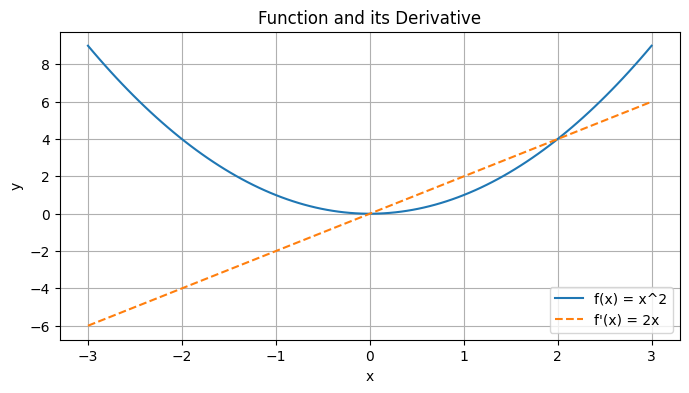

In [3]:
# Visualizing a function and its derivative
x = np.linspace(-3, 3, 100)
y = x**2  # Example: f(x) = x^2
dy_dx = 2*x  # Derivative: f'(x) = 2x

plt.figure(figsize=(8,4))
plt.plot(x, y, label='f(x) = x^2')
plt.plot(x, dy_dx, label="f'(x) = 2x", linestyle='--')
plt.title('Function and its Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In the plot above:
- The solid line shows the function $f(x) = x^2$.
- The dashed line shows its derivative $f'(x) = 2x$.
 
In neural networks, we use derivatives to update weights in the direction that reduces the loss. This is the core idea behind gradient descent.

### 2.1 Gradients in Higher Dimensions

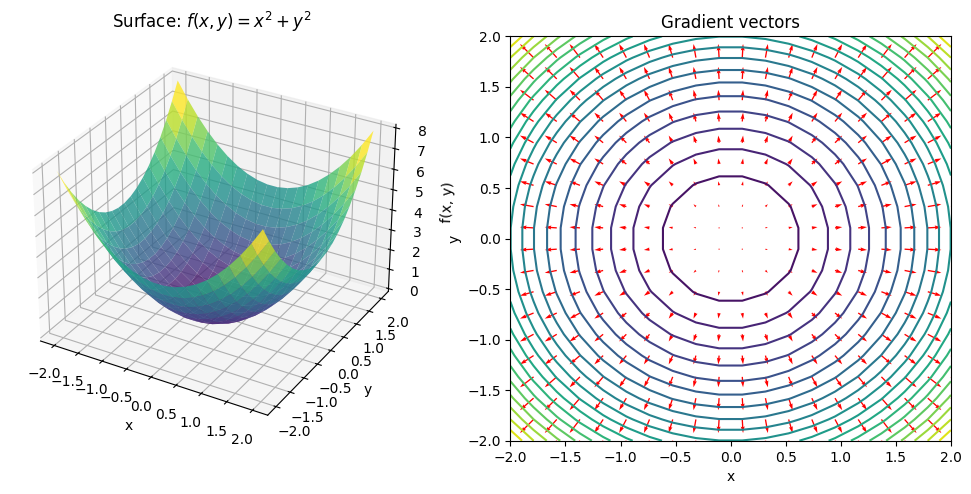

In [4]:
from mpl_toolkits.mplot3d import Axes3D

# Define a function of two variables: f(x, y) = x^2 + y^2
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

# Compute gradients
Zx = 2*X
Zy = 2*Y

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_title('Surface: $f(x, y) = x^2 + y^2$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

ax2 = fig.add_subplot(1,2,2)
ax2.contour(X, Y, Z, 20, cmap='viridis')
ax2.quiver(X, Y, Zx, Zy, color='red')
ax2.set_title('Gradient vectors')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.tight_layout()
plt.show()

- The left plot shows the surface of $f(x, y) = x^2 + y^2$.
- The right plot shows the gradient vectors (arrows) pointing in the direction of steepest ascent.
 
In neural networks, the loss function is often a surface in high-dimensional space. The gradient tells us how to change the weights to reduce the loss.

## 3 Linear Regression: A Foundation for Neural Networks

Linear regression is one of the simplest and most important models in machine learning. It helps us understand how a dependent variable (output) changes as one or more independent variables (inputs) change.

### What is Linear Regression?
Linear regression fits a straight line to data points, modeling the relationship between input $x$ and output $y$ as:
$$ y = wx + b $$
where:
- $w$ is the weight (slope)
- $b$ is the bias (intercept)

The goal is to find $w$ and $b$ that minimize the difference between the predicted and actual values.

### Example: Simple Linear Regression with NumPy

Let's fit a line to some synthetic data:

Best parameters (bias, weight): [4.21509616 2.77011339]


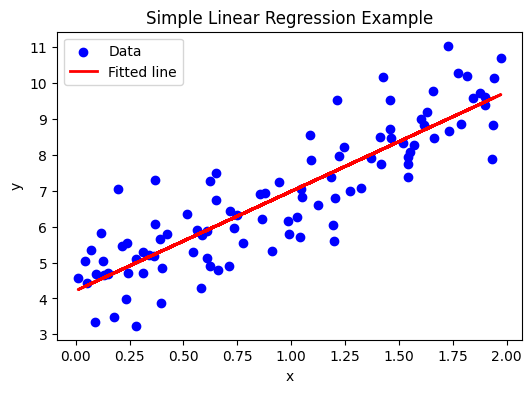

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Analytical solution (Normal Equation)
X_b = np.c_[np.ones((100, 1)), X]  # add bias term
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

print('Best parameters (bias, weight):', theta_best.ravel())

# Predictions
y_pred = X_b @ theta_best

# Plot the data and the fitted line
plt.figure(figsize=(6,4))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Fitted line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple Linear Regression Example')
plt.legend()
plt.show()

**How do we obtain $\theta$ (theta) and what does it mean?**

In linear regression, $\theta$ is a vector containing the model parameters:
- The first element is the bias (intercept) $b$.
- The second element is the weight (slope) $w$.

The goal of linear regression is to find the values of $w$ and $b$ that minimize the mean squared error between the predicted values and the actual data.

**Why do we use the Normal Equation?**
The Normal Equation is a closed-form solution to the linear regression problem. It directly computes the optimal parameters $\theta$ without the need for iterative optimization (like gradient descent).

The equation is:
$$ \theta = (X^T X)^{-1} X^T y $$
where:
- $X$ is the design matrix (with a column of ones for the bias term)
- $y$ is the vector of target values

This formula gives the values of $\theta$ that minimize the sum of squared errors. It works well for small to medium-sized datasets and is a great way to understand the mathematics behind fitting a line to data.

**Explanation:**
- The blue dots represent the synthetic data points generated with some noise.
- The red line is the best fit found by linear regression using the normal equation (analytical solution).
- The parameters found (bias and weight) define the line $y = wx + b$.

**Why is this useful for neural networks?**
- Linear regression is a special case of a single-layer neural network with no activation function.
- Understanding how to fit a line to data helps build intuition for how neural networks learn weights to fit more complex functions.
- The concepts of weights, bias, and loss minimization are foundational for all neural network models.

## 4. Summary and Further Reading

### Key Points
- Vectors and matrices are the core data structures in neural networks.
- Basic operations (addition, multiplication, dot product) are used throughout neural network computations.
- Derivatives and gradients are essential for training neural networks via optimization algorithms like gradient descent.
 
### Further Reading
- [3Blue1Brown: Essence of Linear Algebra (YouTube)](https://www.youtube.com/playlist?list=PLZHQObOWTQDMsr9K-rj53DwVRMYO3t5Yr)

You are now ready to move on to implementing your first perceptron and neural network!